In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import the model and true chains and display (x,y), f, and lnL

In [93]:
chain_x.size

100001

True x, y: 31.500, 30.500
True f: 2500000.00
True min flux: 250.00
True background: 179.00


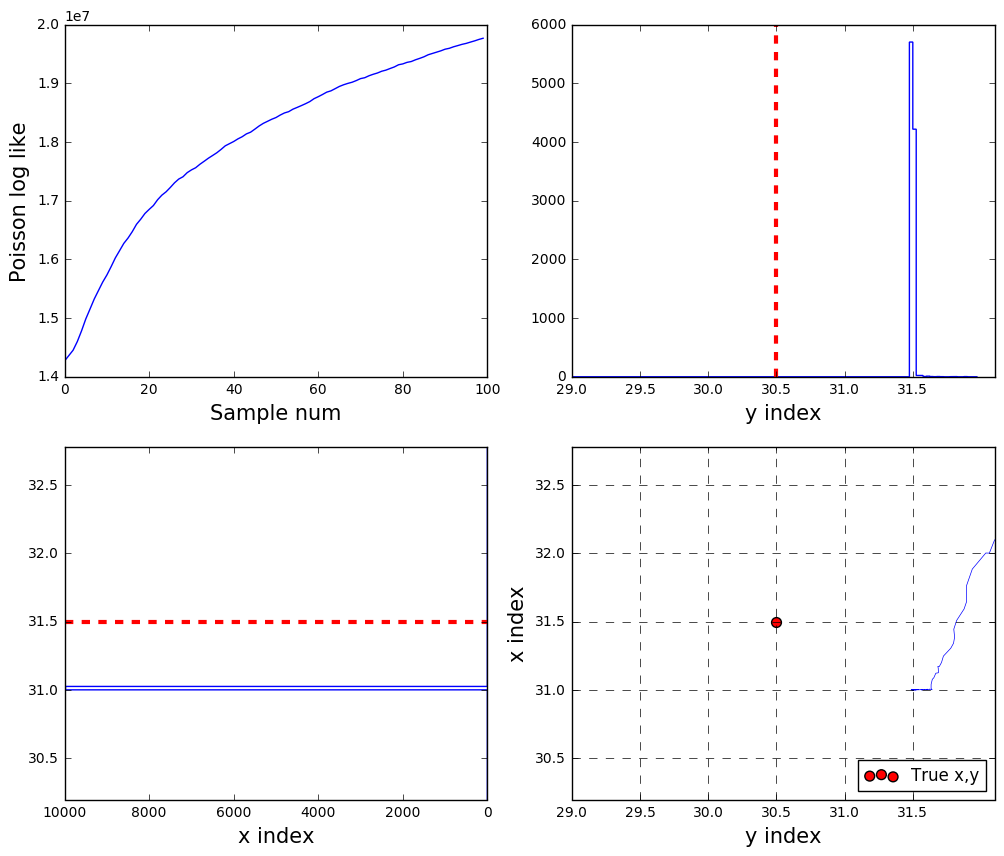

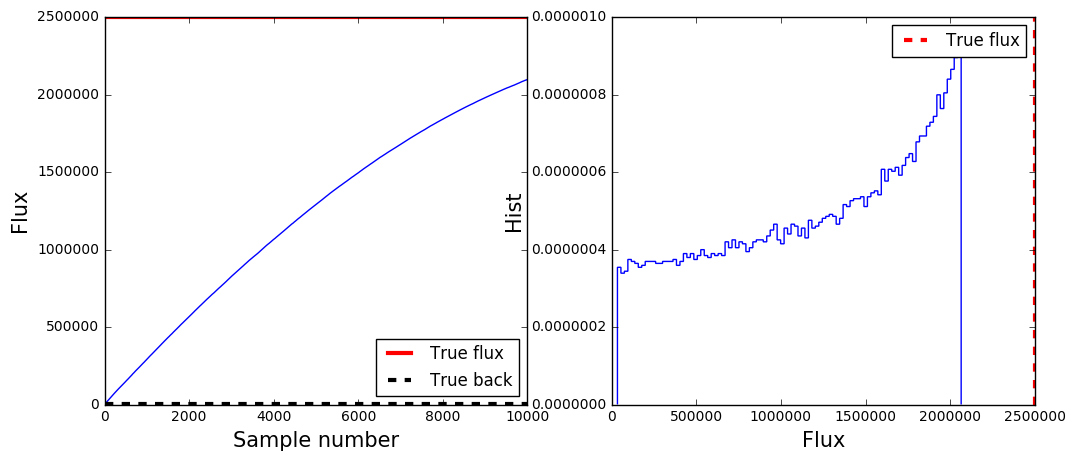

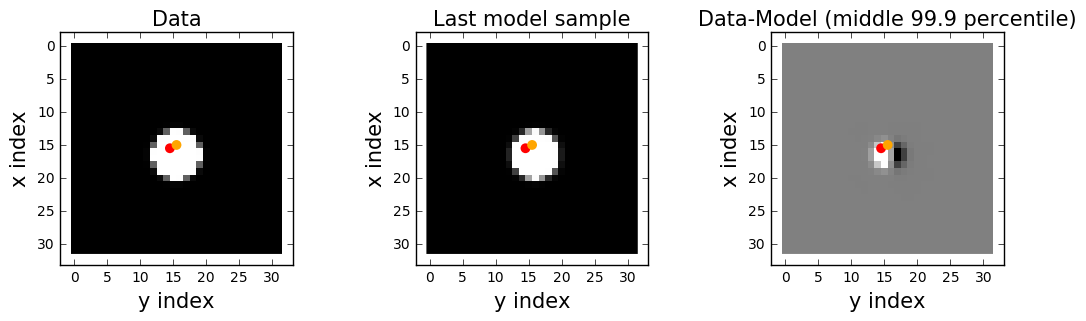

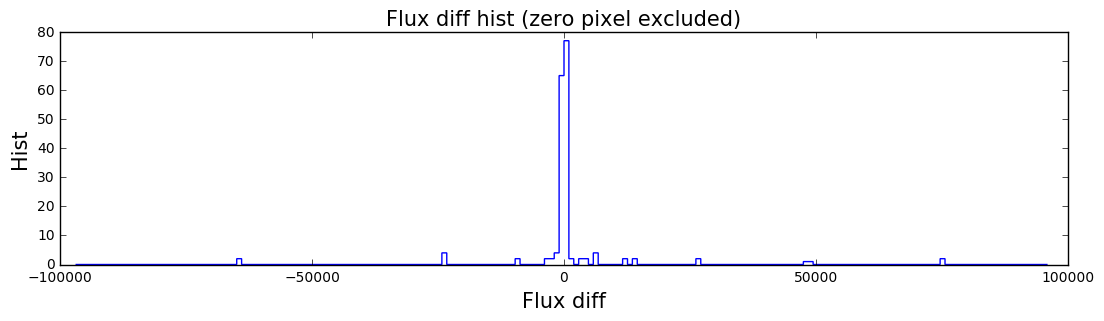

Diff 1 min/max: -64520.398, 130743.250


In [316]:
NSAMPLE = 10000+1
BLOCK = 32
gs = 0.5  # grid spacing
dx_bin = 0.025


# True values 
# read in variaous files
mock_chain_x = np.fromfile("mock_chain_x.bin", dtype=np.float32)
mock_chain_y = np.fromfile("mock_chain_y.bin", dtype=np.float32)
mock_chain_f = np.fromfile("mock_chain_f.bin", dtype=np.float32)
true_x = mock_chain_x[0]
true_y = mock_chain_y[0]
true_f = mock_chain_f[0]
true_min_flux = 250
true_back = 179
print("True x, y: %.3f, %.3f" % (true_x, true_y))
print("True f: %.2f" % true_f)
print("True min flux: %.2f" % true_min_flux)
print("True background: %.2f" % true_back)

# read in variaous files
chain_x = np.fromfile("chain_x.bin", dtype=np.float32).reshape((NSAMPLE, MAX_STAR))
chain_y = np.fromfile("chain_y.bin", dtype=np.float32).reshape((NSAMPLE, MAX_STAR))
chain_f = np.fromfile("chain_f.bin", dtype=np.float32).reshape((NSAMPLE, MAX_STAR))
chain_lnL = np.fromfile("chain_lnL.bin", dtype=np.double)

# Mock chain
MAX_STAR = 1



# Log like sample range
idx_min = 0
idx_max = 100

# Display log likelihood and x y positions
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10, 10))
# log like
fig = plt.figure(figsize=(12,10))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(range(idx_min, idx_max), chain_lnL[idx_min: idx_max])
ax1.set_xlabel("Sample num", fontsize=15)
ax1.set_ylabel("Poisson log like", fontsize=15)
# x,y both 
idx_min = 0 # sample range
idx_max = NSAMPLE
xvec = chain_x[idx_min:idx_max] 
yvec = chain_y[idx_min:idx_max]
ax4 = plt.subplot(2, 2, 4)
ax4.scatter([true_y], [true_x], c="red", s=50, label ="True x,y")
ax4.plot(yvec, xvec, c="blue", lw=0.5)
ax4.grid(color='black', linestyle='--', linewidth=0.5)
ax4.set_aspect("equal")
ax4.set_yticks(np.arange(np.floor(true_x-2*gs), np.ceil(true_x+2*gs), gs))
ax4.set_xticks(np.arange(np.floor(true_y-2*gs), np.ceil(true_y+2*gs), gs))
ax4.set_xlabel("y index", fontsize=15)
ax4.set_ylabel("x index", fontsize=15)
ax4.legend(loc = "lower right")
# x
ax2 = plt.subplot(2, 2, 2, sharex=ax4)
ax2.hist(yvec, bins=np.arange(np.floor(true_y-2*gs), np.ceil(true_y+2*gs), dx_bin), histtype="step")
ax2.axvline(x=true_y, c="red", ls="--", lw=3)
ax2.set_xlabel("y index", fontsize=15)
# y
ax3 = plt.subplot(2, 2, 3, sharey=ax4)
ax3.hist(xvec, bins=np.arange(np.floor(true_x-2*gs), np.ceil(true_x+2*gs), dx_bin), histtype="step", orientation="horizontal")
ax3.set_xlabel("x index", fontsize=15)
ax3.axhline(y=true_x, c="red", ls="--", lw=3)
ax3.invert_xaxis()

# plt.savefig("one-star-loglike-xy.png", dpi=400, bbox_inches="tight")
plt.show()
plt.close()



# Plot flux
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(12, 5))
ax1.plot(range(idx_min, idx_max), chain_f[idx_min: idx_max])
ax1.axhline(y=true_f, c="red", lw=3., label = "True flux")
ax1.axhline(y=true_back, c="black", lw=3., ls="--", label = "True back")
ax1.legend(loc="lower right")
ax1.set_xlabel("Sample number", fontsize=15)
ax1.set_ylabel("Flux", fontsize=15)

f1 = np.percentile(chain_f, 1)
f99= np.percentile(chain_f, 99)
df_bin = (f99-f1)/100
xvec = np.arange(f1, f99, df_bin) #
yvec = (np.exp(-(xvec-true_f)**2/(2*round(true_f+true_back))))/180
# ax2.plot(xvec, yvec)
ax2.hist(chain_f[idx_min: idx_max], bins=xvec, histtype="step", normed=True)
ax2.axvline(x=true_f, c="red", lw=3., label = "True flux", ls="--")
# ax2.axvline(x=true_back, c="black", lw=3., ls="--", label = "True back")
ax2.legend(loc="upper right")
ax2.set_xlabel("Flux", fontsize=15)
ax2.set_ylabel("Hist", fontsize=15)

# plt.savefig("one-star-flux.png", dpi=400, bbox_inches="tight")
plt.show()
plt.close()




# Plot data, model and diff
image_width = 2 * BLOCK
image_size = image_width * image_width

# Data
mock_data = np.fromfile("MOCK_DATA.bin", dtype=np.float32).reshape(image_width, image_width)
mock_model = np.fromfile("MOCK_MODELS.bin", dtype=np.float32)

# Original model
# s = 0
# model0 = mock_model[s*image_size:(s+1)*image_size].reshape(image_width,image_width)

# Final model
s = 1 # sample number
model_sample = mock_model[s*image_size:(s+1)*image_size].reshape(image_width,image_width)

# Difference data - sample
model_diff = mock_data-model_sample 
mock_final_y = chain_y[NSAMPLE-1]
mock_final_x = chain_x[NSAMPLE-1]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 3))
ax1.imshow(mock_data[BLOCK/2:3*BLOCK/2, BLOCK/2:3*BLOCK/2], interpolation="none", cmap="gray", vmin=np.percentile(mock_data, 0), vmax=np.percentile(mock_data, 99))
ax1.scatter([true_y-BLOCK/2], [true_x-BLOCK/2], c="red", s=50, edgecolors="none")
ax1.scatter([mock_final_y-BLOCK/2], [mock_final_x-BLOCK/2], c="orange", s=50, edgecolors="none")
ax1.set_title("Data", fontsize=15)
ax1.set_xlabel("y index", fontsize=15)
ax1.set_ylabel("x index", fontsize=15)

ax2.imshow(model_sample[BLOCK/2:3*BLOCK/2, BLOCK/2:3*BLOCK/2], interpolation="none", cmap="gray", vmin=np.percentile(mock_data, 0), vmax=np.percentile(mock_data, 99))
ax2.scatter([true_y-BLOCK/2], [true_x-BLOCK/2], c="red", s=50, edgecolors="none")
ax2.scatter([mock_final_y-BLOCK/2], [mock_final_x-BLOCK/2], c="orange", s=50, edgecolors="none")
ax2.set_title("Last model sample", fontsize=15)
ax2.set_xlabel("y index", fontsize=15)
ax2.set_ylabel("x index", fontsize=15)

diff99 = max(np.abs(np.percentile(model_diff, 0.1)), np.abs(np.percentile(model_diff, 99.9)))
ax3.imshow(model_diff[BLOCK/2:3*BLOCK/2, BLOCK/2:3*BLOCK/2], interpolation="none", cmap="gray",  vmin=-diff99, vmax=diff99)
ax3.scatter([true_y-BLOCK/2], [true_x-BLOCK/2], c="red", s=50, edgecolors="none")
ax3.scatter([mock_final_y-BLOCK/2], [mock_final_x-BLOCK/2], c="orange", s=50, edgecolors="none")
ax3.set_title("Data-Model (middle 99.9 percentile)", fontsize=15)
ax3.set_xlabel("y index", fontsize=15)
ax3.set_ylabel("x index", fontsize=15)
# plt.savefig("one-star-data-model-diff.png", dpi=400)
plt.show()
plt.close()

model_diff_linear = model_diff.ravel()
fig, ax = plt.subplots(1, figsize= (13,3))
ax.hist(model_diff_linear[np.where(np.abs(model_diff_linear)>1e-5)], bins=np.arange(-2*diff99, 2*diff99, diff99/50), histtype="step")
ax.locator_params(axis="x", nticks=5)
ax.locator_params(axis="y", nticks=5)
ax.set_ylabel("Hist", fontsize=15)
ax.set_xlabel("Flux diff", fontsize=15)
ax.set_title("Flux diff hist (zero pixel excluded)", fontsize=15)
# plt.savefig("one-star-data-model-diff.png", dpi=400)
plt.show()
plt.close()

print("Diff %d min/max: %.3f, %.3f" % (s, model_diff_linear.min(), model_diff_linear.max()))


# Likelihood surface study

In [317]:
# Fit function
def psf_poly_fit(psf0, nbin):
    assert psf0.shape[0] == psf0.shape[1] # assert PSF is square
    npix = psf0.shape[0]

    # pad by one row and one column
    psf = np.zeros((npix+1, npix+1), dtype=np.float32)
    psf[0:npix, 0:npix] = psf0

    # make design matrix for each nbin x nbin region
    nc = npix/nbin # dimension of original psf
    nx = nbin+1
    y, x = np.mgrid[0:nx, 0:nx] / np.float32(nbin)
    x = x.flatten()
    y = y.flatten()
    A = np.column_stack([np.full(nx*nx, 1, dtype=np.float32), x, y, x*x, x*y, y*y, x*x*x, x*x*y, x*y*y, y*y*y]).astype(np.float32)
    # output array of coefficients
    cf = np.zeros((A.shape[1], nc, nc), dtype=np.float32)

    # loop over original psf pixels and get fit coefficients
    for iy in xrange(nc):
        for ix in xrange(nc):
            # solve p = A cf for cf
            p = psf[iy*nbin:(iy+1)*nbin+1, ix*nbin:(ix+1)*nbin+1].flatten()
            AtAinv = np.linalg.inv(np.dot(A.T, A))
            ans = np.dot(AtAinv, np.dot(A.T, p))
            cf[:,iy,ix] = ans

    return cf.reshape(cf.shape[0], cf.shape[1]*cf.shape[2])

Sum of psf 25.000


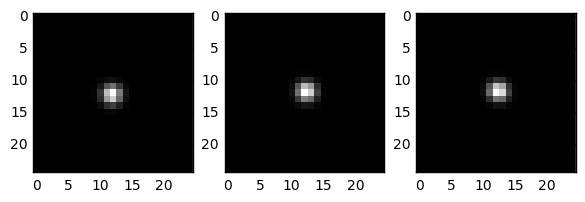

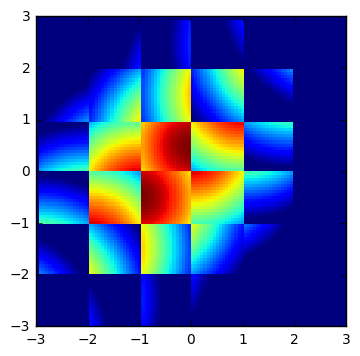

(-2025.0003942180592, -2024.9996061187539)


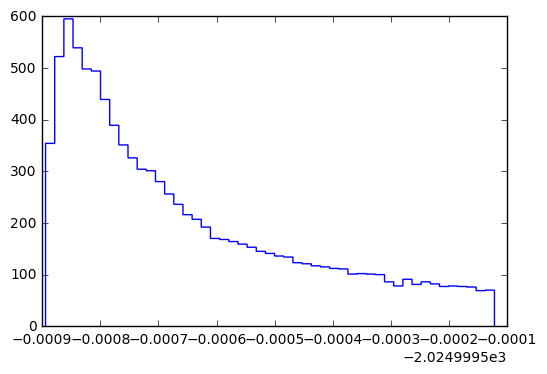

In [465]:
# Construct the gaussian psf
upscale_factor = 25
sig_psf = 5.
xy_center = 61.5
x = np.arange(0, 125, 1.0) - xy_center
xx, yy = np.meshgrid(x, x, sparse=True)
psf = (upscale_factor/(2*np.pi*(sig_psf**2))) * np.exp(-(xx**2+yy**2)/(2.*(sig_psf**2)))

print("Sum of psf %.3f" % psf.sum())

# # Or use real psf
# nbin=5
# f = open('../pcat-lion/Data/sdss.0921_psf.txt')
# npix, up_sampling_rate = [np.int32(i) for i in f.readline().split()]
# f.close()
# psf = np.loadtxt('../pcat-lion/Data/sdss.0921_psf.txt', skiprows=1).astype(np.float32)

nbin = 5
A = psf_poly_fit(psf, nbin=nbin)
INNER = A.shape[0]

# Don't save anything?? 
# A.astype(np.float32).ravel().tofile("A_sdss.bin")



FLUX = 0.1
BACKGROUND = 1.


# Pratice
dx = 0.5
dy = 0.
dX = np.asarray([1, dx, dy, dx*dx, dx*dy, dy*dy, dx*dx*dx, dx*dx*dy, dx*dy*dy, dy*dy*dy])
PSF0 = (np.dot(dX, A).reshape((25,25)) * FLUX).astype(np.double)

dx = 0.0
dy = 0.5
dX = np.asarray([1, dx, dy, dx*dx, dx*dy, dy*dy, dx*dx*dx, dx*dx*dy, dx*dy*dy, dy*dy*dy])
PSF_shifted = np.dot(dX, A).reshape((25,25)).astype(np.double)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 20))

ax1.imshow(PSF0, interpolation="none", cmap="gray")
ax2.imshow(PSF_shifted, interpolation="none", cmap="gray")
ax3.imshow(PSF_shifted-PSF0, interpolation="none", cmap="gray")
plt.show()
plt.close()



# Define a grid of dx, dy ranging from -1, 1 with 0.001 spacing and compute loglike. 
# Treat dx=dy=0 case as the data. Observe how the result varies.
BLOCK = 25
PAD = 10
PADDED_PSF0 = np.ones((BLOCK+2*PAD, BLOCK+2*PAD), dtype=np.double) * BACKGROUND
PADDED_PSF0[PAD:PAD+BLOCK, PAD:PAD+BLOCK] += PSF0

NSAMPLE_PER_DIM = 100
lnL = np.zeros((NSAMPLE_PER_DIM, NSAMPLE_PER_DIM))
int_shift = 3
dshift = 2.*int_shift/(NSAMPLE_PER_DIM-1)


for i, x_objs in enumerate(np.arange(-int_shift, int_shift+dshift*0.9, dshift)): # In x direction
    for j, y_objs in enumerate(np.arange(-int_shift, int_shift+dshift*0.9, dshift)): # In y direction
        # Ceiling
        ix = int(np.ceil(x_objs))
        iy = int(np.ceil(y_objs))      
        dx = ix-x_objs
        dy = iy-y_objs
#         # Floor
#         ix = int(np.floor(x_objs))
#         iy = int(np.floor(y_objs))          
#         dx = x_objs-ix
#         dy = y_objs-iy
        dX = np.asarray([1, dx, dy, dx*dx, dx*dy, dy*dy, dx*dx*dx, dx*dx*dy, dx*dy*dy, dy*dy*dy])
        PSF_shifted = (np.dot(dX, A).reshape((25,25)) * FLUX).astype(np.double)
        PADDED_PSF_shifted = np.ones((BLOCK+2*PAD, BLOCK+2*PAD), dtype=np.double) * BACKGROUND
        PADDED_PSF_shifted[PAD+ix:PAD+BLOCK+ix, PAD+iy:PAD+BLOCK+iy] += PSF_shifted
        lnL[i, j] = (np.log(PADDED_PSF_shifted) * PADDED_PSF0 - PADDED_PSF_shifted).sum()
#         print(i, j, dx, dy, ix, iy, lnL[i,j])

plt.imshow(lnL, vmin=np.percentile(lnL, 50), vmax=np.percentile(lnL,99.999), interpolation="none", extent=(-int_shift,int_shift,-int_shift,int_shift))
# plt.xticks(np.arange(-int_shift,int_shift*1.1,0.5))
plt.savefig("lnL-struc-x0p5-y0.png", dpi=400, bbox_inches="tight")
plt.show()
plt.close()

lnL_low = np.percentile(lnL, 0.01)
lnL_high = np.percentile(lnL, 99.9)
print(lnL_low, lnL_high)
plt.hist(lnL.ravel(), bins=np.arange(lnL_low, lnL_high, (lnL_high-lnL_low)/50), histtype="step")
plt.show()
plt.close()

# Check random number

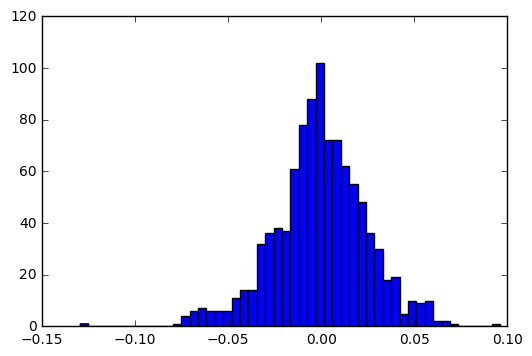

In [13]:
# X position 
dx = np.asarray([0.01155, 0.01223, -0.00470, 0.00173, -0.00733, -0.01116, -0.01949, 0.01993, 0.00313, -0.00256, 0.00083, 0.00339, 0.00590, 0.01149, -0.00013, 0.01004, -0.00213, -0.01701, 0.01019, -0.00310, 0.02345, 0.01180, -0.00429, 0.00223, 0.00098, -0.00420, 0.00810, 0.01255, -0.01308, 0.00351, 0.00278, -0.01426, -0.00582, -0.00065, 0.02121, 0.00917, 0.00646, -0.00954, -0.00133, -0.01546, -0.00245, -0.02771, 0.01122, 0.00821, -0.00161, -0.01803, -0.00769, 0.00551, -0.00933, 0.01344, 0.00744, -0.00278, -0.00559, -0.00953, -0.00785, 0.01328, 0.00119, 0.01206, 0.00688, -0.00298, -0.01002, 0.00687, 0.02178, 0.02126, 0.02864, -0.00906, -0.01309, -0.00085, 0.00234, 0.00549, -0.00960, -0.00393, -0.01868, -0.00683, 0.00841, -0.00198, 0.00286, 0.03734, -0.01480, -0.00251, 0.01371, 0.00637, 0.00897, 0.01664, -0.01013, 0.00068, -0.00899, -0.00742, 0.01407, 0.00654, 0.00762, 0.00508, -0.00250, 0.00067, 0.00087, -0.01438, -0.00007, 0.00811, 0.00166, -0.00632, -0.02488, 0.00245, -0.00953, -0.00649, 0.01233, -0.01496, -0.00897, 0.00070, -0.01232, -0.01055, 0.00168, -0.00430, -0.00913, 0.01748, 0.00822, 0.00746, -0.00376, -0.00186, 0.00063, 0.01736, -0.00957, -0.01059, 0.00860, 0.00074, -0.01884, -0.01491, -0.00088, 0.01364, 0.00033, 0.02561, -0.01600, -0.01343, 0.01836, 0.02334, 0.00486, -0.00798, -0.00595, 0.00921, 0.00032, 0.03745, -0.00713, -0.00773, -0.01072, 0.00285, -0.00613, -0.00167, -0.01287, 0.00433, -0.00574, 0.00545, 0.02899, -0.01280, 0.00896, 0.02295, -0.02744, 0.01771, -0.01381, 0.01933, -0.00498, -0.00038, 0.02054, 0.01240, -0.01100, 0.02889, -0.00395, -0.04541, -0.00257, -0.00815, -0.00008, -0.01872, -0.00077, -0.00003, -0.00491, 0.00434, 0.01725, 0.02544, -0.00352, -0.00638, 0.01289, -0.02631, -0.03204, -0.00902, -0.00579, -0.00731, -0.02037, 0.00866, -0.01873, 0.01035, 0.01865, 0.01389, -0.00325, 0.01865, 0.01899, 0.00273, -0.02220, 0.00518, 0.00769, -0.00808, 0.01727, -0.00746, 0.01451, 0.00679, 0.02872, 0.00116, -0.00249, 0.02359, -0.00360, 0.01310, 0.00428, 0.02492, 0.00088, 0.01527, 0.02617, -0.02195, 0.00808, -0.01243, 0.01814, 0.00049, 0.03100, -0.02856, -0.01590, -0.02301, -0.00410, 0.01780, -0.00960, 0.01712, -0.01468, -0.00172, -0.00359, -0.00179, 0.01435, -0.03336, -0.01769, 0.00087, 0.00821, 0.00841, -0.00361, -0.00134, 0.04679, 0.00031, 0.01313, -0.00195, -0.00365, 0.02953, -0.01737, -0.02593, -0.01792, -0.03361, -0.01848, -0.01219, 0.02077, 0.01017, -0.02105, 0.00273, -0.02301, 0.00674, 0.03820, 0.02097, -0.00144, -0.00201, -0.00514, -0.01600, 0.01891, -0.00930, -0.00210, -0.01414, -0.02608, 0.02705, 0.01018, -0.01430, -0.00890, 0.01564, 0.01219, 0.01242, 0.00652, 0.00320, -0.00871, -0.00887, -0.00077, 0.00595, -0.01686, -0.01010, 0.01384, 0.01470, -0.02219, 0.02371, 0.00130, -0.01282, 0.00168, -0.00744, 0.03532, 0.00865, -0.00979, 0.02976, 0.00323, -0.01322, 0.00215, 0.00537, 0.01254, 0.00816, -0.03114, 0.00082, -0.00970, -0.00014, 0.00783, -0.00311, 0.01426, -0.02358, 0.01549, -0.02556, -0.02281, -0.00697, -0.00100, 0.01085, 0.01530, 0.00075, -0.01558, -0.00927, 0.01332, 0.02223, 0.00050, 0.00863, -0.04067, 0.01927, 0.04036, 0.02559, 0.00427, -0.00381, 0.00592, 0.01302, -0.00548, -0.01751, -0.00218, -0.02768, -0.01182, -0.00699, -0.02250, -0.01458, -0.03404, 0.03178, -0.00713, -0.01197, -0.01269, 0.01159, -0.01631, 0.01693, -0.00062, 0.00151, 0.01156, 0.00049, -0.00681, -0.00677, -0.01212, -0.02075, 0.00157, 0.00928, 0.00291, 0.02879, -0.02555, 0.02872, 0.00933, -0.01090, -0.01339, 0.00818, 0.01891, -0.01898, 0.01873, 0.00458, -0.02730, -0.01529, 0.01629, 0.00812, -0.01710, -0.02500, -0.01477, 0.01044, -0.00815, 0.02805, 0.00115, -0.01073, -0.01431, -0.04653, 0.01645, 0.03836, 0.00311, 0.00902, 0.02975, 0.02251, 0.00487, -0.00967, -0.01044, -0.00373, 0.00266, -0.01637, -0.02029, -0.00802, 0.01181, -0.06194, 0.00609, -0.02330, 0.00308, 0.00590, 0.02951, 0.02027, -0.00877, 0.00691, -0.01600, -0.00118, -0.01797, 0.01262, 0.01743, 0.01578, 0.00173, -0.02424, -0.01470, 0.03374, -0.01195, -0.00209, 0.00922, -0.02871, 0.03415, -0.00477, 0.05709, -0.01951, 0.03825, -0.02913, 0.02009, 0.01305, 0.05843, -0.00305, 0.02455, -0.00173, -0.02748, -0.03532, -0.01181, 0.00825, 0.00778, 0.00213, 0.02364, -0.03270, 0.02785, -0.02141, -0.00080, -0.03115, -0.03013, 0.00291, 0.01565, 0.00260, -0.00887, -0.00663, -0.00336, -0.03951, 0.00910, -0.01118, -0.05076, 0.02754, 0.03799, 0.00682, 0.05498, -0.01783, -0.02459, -0.03536, 0.00503, 0.00541, 0.02492, -0.05737, 0.02130, 0.01937, 0.00714, -0.00585, -0.01134, -0.01774, 0.02140, 0.03923, 0.04965, 0.00588, 0.01101, -0.00949, 0.00265, -0.00168, -0.01333, 0.02748, -0.00141, 0.01360, -0.00951, 0.02117, 0.00553, -0.01981, 0.06856, 0.05486, -0.00508, -0.04871, -0.03283, -0.00116, -0.00364, -0.05306, -0.00608, -0.02922, -0.00867, -0.03015, 0.02434, 0.05387, -0.03649, -0.02885, -0.01399, -0.02681, -0.01226, 0.00482, 0.03284, 0.03866, -0.05004, 0.01621, 0.00118, -0.00204, 0.02023, 0.00224, 0.02058, -0.00987, 0.04851, 0.02578, -0.00088, 0.02629, -0.01279, 0.03204, 0.00326, -0.01715, 0.05737, -0.01040, -0.02148, -0.02397, -0.00819, -0.07009, 0.02736, 0.01377, -0.01497, -0.01100, -0.01946, 0.04041, -0.02471, 0.00405, -0.00446, 0.05253, 0.00614, -0.01105, 0.01665, -0.04869, -0.03823, 0.02179, -0.04387, -0.00297, -0.06388, -0.00620, -0.02243, -0.00605, 0.04054, 0.01545, -0.02072, -0.05332, 0.03196, -0.02860, -0.04435, 0.04937, -0.05178, -0.03072, 0.02680, 0.07233, -0.04144, 0.04725, 0.02374, 0.02213, -0.02655, 0.02761, -0.07064, 0.01196, -0.01281, 0.02238, 0.03419, -0.01150, -0.00767, 0.03331, 0.01488, 0.00724, 0.00216, -0.01112, -0.00349, 0.02414, 0.02934, -0.02490, -0.06345, -0.00178, 0.02964, 0.02491, -0.00683, -0.00751, 0.02534, 0.04908, 0.00861, -0.05472, -0.05863, 0.03202, -0.00753, 0.01968, 0.05748, 0.04767, 0.01747, 0.02221, -0.06164, -0.06392, 0.00980, -0.04162, -0.02835, -0.04313, 0.01887, -0.00709, -0.01390, 0.03654, -0.06996, -0.00157, 0.05243, 0.02386, -0.03355, 0.02927, 0.01697, -0.02958, 0.05189, 0.00348, -0.03446, -0.03425, -0.01467, 0.02213, -0.02657, -0.02245, -0.03583, -0.03281, -0.06551, -0.01663, -0.02058, -0.04101, 0.01232, -0.00691, -0.01873, -0.00632, -0.01768, 0.01200, -0.02177, 0.01431, -0.04495, 0.01815, -0.06704, 0.00078, 0.00993, -0.03509, -0.00278, 0.01705, -0.00094, 0.00121, -0.00034, -0.01174, 0.01983, -0.06568, -0.00909, -0.00128, 0.01327, -0.02126, -0.01523, 0.01324, -0.03774, -0.02625, 0.05748, -0.07525, -0.02285, 0.01677, -0.06122, -0.03083, 0.05272, 0.00746, 0.00126, 0.04909, -0.05405, -0.00071, 0.05585, -0.02552, 0.04156, 0.00591, 0.02791, 0.01262, 0.01311, 0.03335, -0.02396, 0.01155, 0.03578, 0.00236, 0.04643, -0.00200, 0.00187, -0.07477, 0.00745, -0.00030, 0.01562, -0.05004, -0.00707, 0.04993, -0.00044, -0.03303, 0.01788, -0.01841, -0.03140, 0.00004, 0.02796, 0.00001, 0.01472, 0.02054, 0.01417, 0.00912, -0.02178, 0.01353, -0.12951, -0.07120, -0.01672, 0.04248, -0.07036, 0.06652, -0.02754, 0.01615, 0.06129, 0.02972, -0.00274, -0.00558, 0.03772, 0.02154, -0.03546, 0.03999, -0.04109, 0.02446, -0.00296, 0.02218, -0.05771, 0.01777, 0.04457, -0.00609, 0.01264, 0.01627, 0.00691, -0.00450, 0.05837, 0.02234, 0.02050, 0.00641, -0.02823, 0.03487, -0.02270, -0.04545, -0.04229, -0.07652, -0.00562, -0.03320, 0.03390, 0.02320, 0.01879, -0.03248, -0.00520, 0.02905, -0.01116, 0.03190, -0.04146, -0.03662, 0.02852, -0.03206, 0.01046, 0.05645, -0.00394, -0.00212, 0.00799, -0.02834, 0.02143, 0.01310, -0.01694, -0.03424, 0.01268, -0.01372, -0.01544, -0.02624, -0.00016, -0.01169, 0.03972, -0.02190, -0.00279, -0.04406, 0.03280, -0.02851, -0.00943, -0.00683, 0.03787, -0.03199, 0.01592, 0.02859, -0.05289, -0.00268, 0.00264, 0.02713, 0.01109, 0.06173, -0.03352, -0.02203, 0.00699, 0.01295, -0.01153, -0.00585, 0.01715, 0.00641, -0.00162, -0.01305, 0.00937, -0.00730, -0.01577, 0.01559, -0.00743, -0.00604, 0.00274, -0.00829, -0.02402, -0.05529, 0.01413, 0.03757, 0.03675, -0.03585, 0.04297, 0.04182, -0.02539, -0.02911, -0.02351, -0.00816, -0.00428, -0.03090, -0.00758, 0.04676, -0.00347, 0.03458, 0.02784, -0.00529, 0.02888, -0.04802, -0.00190, -0.01173, 0.00899, 0.00338, 0.00233, -0.06792, -0.04658, 0.00459, 0.00461, 0.01034, 0.01220, 0.05621, 0.01558, 0.00146, -0.01023, 0.00609, 0.02670, -0.00808, -0.01328, -0.00671, -0.00825, 0.02181, -0.00040, -0.00729, 0.05757, 0.00828, -0.01640, -0.02178, -0.01538, -0.02110, -0.02752, -0.02624, 0.00390, -0.00325, -0.01136, -0.00358, 0.00650, -0.01487, 0.02621, 0.00189, -0.02366, -0.06146, -0.00018, 0.02039, -0.01476, 0.00278, 0.01545, 0.02621, 0.01553, -0.02802, -0.01230, 0.02743, -0.03660, 0.02917, -0.00798, -0.02830, -0.03177, 0.09633, 0.02373, 0.00015, 0.02819, 0.03316, -0.04177, -0.03237, 0.00430, -0.00654, -0.01038, -0.01171, -0.02062, 0.02034, 0.03302, 0.05359, -0.02724, 0.01377, -0.01251, -0.01403, -0.00350, 0.00602, -0.01600, 0.04017, -0.00368, -0.06313, 0.04001, -0.03268, 0.01316, -0.01363, -0.04279, -0.00601, 0.02315, 0.03273, 0.02092, -0.00282, -0.00140, 0.02545, -0.00096, -0.00664, 0.04047, 0.04344, -0.00276, -0.00976, 0.02379, 0.01061, -0.03486, -0.03508, -0.04466, -0.01942, 0.02333, 0.02125, -0.03865, -0.01062, -0.02757, 0.01616, 0.01517, -0.00653, 0.03902, -0.03159, 0.03117, -0.03025, -0.01529, -0.00322, -0.03355, 0.05299, 0.01248, 0.00091, 0.02431, -0.00551, 0.00685, 0.01982, 0.01030, -0.03111, -0.07469, -0.00913, -0.01240, -0.00217, -0.03999, -0.02563, -0.04403, 0.00425, -0.03953, 0.01225, 0.01660, 0.00254, 0.02455, 0.00380, 0.03138, -0.02568, -0.02925, -0.04001, -0.00087, 0.03564, 0.02477, -0.02491, -0.01609, 0.01908, 0.01933, 0.03460, -0.03365, -0.02137])
plt.hist(dx, bins = 50)
plt.show()

plt.close()

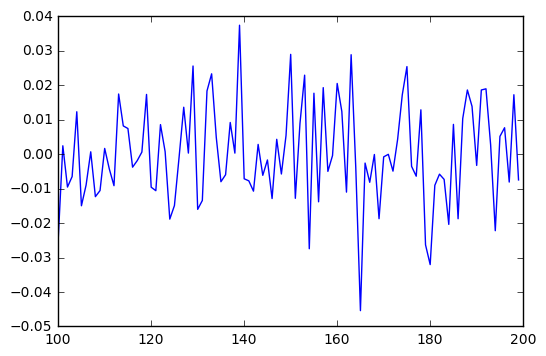

In [16]:
idx_min = 100
idx_max = 200
plt.plot(range(idx_min, idx_max), dx[idx_min: idx_max])
plt.show()
plt.close()